In [206]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [432]:
df1 = pd.read_csv('1basic_info.csv')
df2 = pd.read_csv('2basic_diseases.csv')
df3 = pd.read_csv('4antibiotics.csv')
df4 = pd.read_csv('7med_result.csv')

In [691]:
data = df1.merge(df2, on='VTHOS_NO', how='inner')
data=data.merge(df3, on = 'VTHOS_NO', how = 'inner')
data=data.merge(df4, on = 'VTHOS_NO', how = 'inner')
data.dropna(axis=1, how='all', inplace=True)
data

,Unnamed: 0_x,VTHOS_NO,RGNO_x,AGRDE,SEX_CD,AREA_ADRES,VTHOS_CLSF_CD,IADM_DEPTT_NM,DEPTT_NM,ADM_YMD,...,LTHT_DPRSC_YN,WARD_CONT,ATC_CONT,GRAM_EXCHE_CONT,ESB_TX_ID_x,ESB_STATE_CD_x,ESB_TIME_x,RGNO_y,RSLT_CONT,WTHN30_REHOSP_YN
0,1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,70대,F,대전광역시 대덕구,I,NS,NS,20560929,...,N,GW,J01DB04,1.000,b'',b'',b'',0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,완쾌,N
1,1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,70대,F,대전광역시 대덕구,I,NS,NS,20560929,...,N,GW,J01DB04,1.000,b'',b'',b'',0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,완쾌,N
2,1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,70대,F,대전광역시 대덕구,I,NS,NS,20560929,...,N,GW,J01DB04,1.000,b'',b'',b'',0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,완쾌,N
3,1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,70대,F,대전광역시 대덕구,I,NS,NS,20560929,...,N,GW,J01DB04,1.000,b'',b'',b'',0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,완쾌,N
4,1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,70대,F,대전광역시 대덕구,I,NS,NS,20560929,...,N,GW,J01DB04,1.000,b'',b'',b'',0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,완쾌,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736365,249617,0x4689a79f4652d26bf4456f6e802c2b03fb710a7c18af...,0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,60대,M,경기도 용인시,I,M1,M1,20210317,...,N,ER,J05AH02,0.075,b'',b'',b'',0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,경쾌,N
3736366,249617,0x4689a79f4652d26bf4456f6e802c2b03fb710a7c18af...,0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,60대,M,경기도 용인시,I,M1,M1,20210317,...,N,ER,J05AH02,0.075,b'',b'',b'',0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,경쾌,N
3736367,249617,0x4689a79f4652d26bf4456f6e802c2b03fb710a7c18af...,0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,60대,M,경기도 용인시,I,M1,M1,20210317,...,N,GW,J05AH02,0.075,b'',b'',b'',0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,경쾌,N
3736368,249617,0x4689a79f4652d26bf4456f6e802c2b03fb710a7c18af...,0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,60대,M,경기도 용인시,I,M1,M1,20210317,...,N,GW,J05AH02,0.075,b'',b'',b'',0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,경쾌,N


In [434]:
data['DIAG_NM'] = data["DIAG_NM"].replace('Special screening examination for Coronavirus disease 2019 (COVID-19)','COVID-19')

In [435]:
sex_ = data.groupby(["SEX_CD", "DIAG_NM"]).size().reset_index(name="COUNT")
sex_

,SEX_CD,DIAG_NM,COUNT
0,F,"3rd Nerve palsy, left",7
1,F,"4th Nerve palsy, left",1
2,F,"6th Nerve palsy, right",43
3,F,ABO isoimmunization of fetus and newborn,14
4,F,ACL rupture (anterior cruciate ligament rupture),12
...,...,...,...
13126,M,"fracture, radius, distal, right",1
13127,M,herpetic keratitis,16
13128,M,microvascular angina,18
13129,M,patella tendon rupture,68


In [436]:
top_10_female = sex_[sex_["SEX_CD"] == "F"].nlargest(10, "COUNT")
top_10_male = sex_[sex_["SEX_CD"] == "M"].nlargest(10, "COUNT")
top_10_female

,SEX_CD,DIAG_NM,COUNT
844,F,COVID-19,63875
2944,F,Hypertension,46446
4857,F,Pneumonia,41054
1397,F,Constipation,40978
6503,F,Urinary tract infection,22179
2539,F,Gastritis,21715
5664,F,Sepsis,21051
799,F,Bronchitis,19287
2700,F,Heart failure,19050
149,F,Acute gastroenteritis,17889


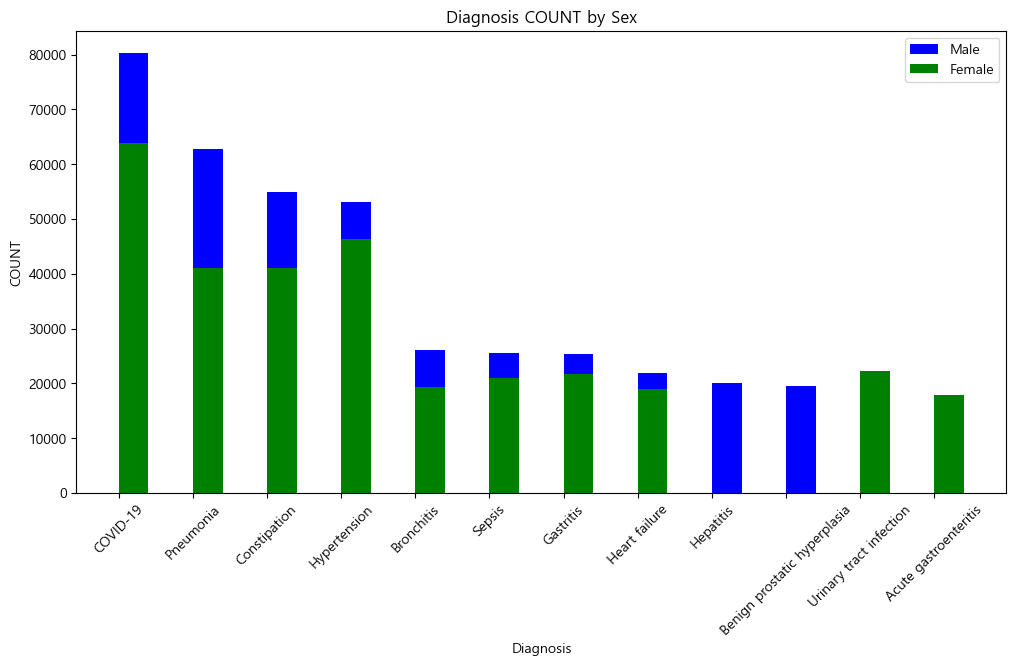

In [438]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_male['DIAG_NM'], top_10_male['COUNT'],
        color='blue', label='Male', width=0.4, align='edge')
plt.bar(top_10_female['DIAG_NM'], top_10_female['COUNT'],
        color='green', label='Female', width=0.4, align='edge')

plt.xlabel('Diagnosis')
plt.ylabel('COUNT')
plt.title('Diagnosis COUNT by Sex')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [287]:
# 간염 , 전립샘 비대증 남성이 비교적 더 많이 
# 요로 감염, 급성 위장염 여성이 비교적 더 많이

In [288]:
# 2) 지역별 바탕질환 현황을 조사하시오.
# - 주요 질병/질환의 지역별 발생현황
# - 지역별 질병 증가율(수도권 중심)

In [439]:
area = data.groupby(["AREA_ADRES", "DIAG_NM"]).size().reset_index(name="COUNT")
area

,AREA_ADRES,DIAG_NM,COUNT
0,강원도 강릉시,Abnormal EKG,5
1,강원도 강릉시,Acute cholangitis,14
2,강원도 강릉시,Acute gastroenteritis,6
3,강원도 강릉시,Acute kidney injury,6
4,강원도 강릉시,Acute pyelonephritis,8
...,...,...,...
40420,충청북도 충주시,Urinary tract infection,79
40421,충청북도 충주시,Vitamin D deficiency,46
40422,충청북도 충주시,Weight loss (abnormal),4
40423,충청북도 충주시,Wheezing,1


In [440]:
adres=area.groupby('AREA_ADRES')['COUNT'].sum().reset_index()
adres=adres.sort_values(by = 'COUNT',ascending = False).head(15)
adres

,AREA_ADRES,COUNT
41,경기도 용인시,2503824
30,경기도 수원시,118686
29,경기도 성남시,112987
44,경기도 이천시,111927
49,경기도 화성시,67029
22,경기도 광주시,60251
33,경기도 안성시,40854
46,경기도 평택시,39738
38,경기도 여주시,23566
48,경기도 하남시,22223


In [441]:
import plotly.express as px

fig = px.pie(adres, names='AREA_ADRES', values='COUNT', title='City by COUNT ')
fig.show()

In [442]:
k1 = area[area['AREA_ADRES'] == "경기도 용인시"].sort_values(by="COUNT",ascending=False).head(2)
k2 = area[area['AREA_ADRES'] == "경기도 수원시"].sort_values(by="COUNT",ascending=False).head(2)
k3 = area[area['AREA_ADRES'] == "경기도 성남시"].sort_values(by="COUNT",ascending=False).head(2)
k4 = area[area['AREA_ADRES'] == "경기도 이천시"].sort_values(by="COUNT",ascending=False).head(2)
k5 = area[area['AREA_ADRES'] == "경기도 화성시"].sort_values(by="COUNT",ascending=False).head(2)
k6 = area[area['AREA_ADRES'] == "경기도 광주시"].sort_values(by="COUNT",ascending=False).head(2)
k7 = area[area['AREA_ADRES'] == "경기도 안성시"].sort_values(by="COUNT",ascending=False).head(2)
k8 = area[area['AREA_ADRES'] == "경기도 평택시"].sort_values(by="COUNT",ascending=False).head(2)
k9 = area[area['AREA_ADRES'] == "경기도 여주시"].sort_values(by="COUNT",ascending=False).head(2)
k10 = area[area['AREA_ADRES'] == "경기도 하남시"].sort_values(by="COUNT",ascending=False).head(2)
doxi = pd.concat([k1,k2,k3,k4,k5,k6,k7,k8,k9,k10])
doxi = doxi[doxi["DIAG_NM"] != "COVID-19"]
doxi # 코로나를 제외한 도시별 가장 많은 질병

,AREA_ADRES,DIAG_NM,COUNT
17047,경기도 용인시,Pneumonia,79150
6172,경기도 수원시,Constipation,3468
4713,경기도 성남시,Constipation,2950
19989,경기도 이천시,Constipation,2934
23157,경기도 화성시,Constipation,2264
2589,경기도 광주시,Hypertension,1508
8782,경기도 안성시,Hypertension,1593
21673,경기도 평택시,Constipation,1090
10577,경기도 여주시,Sepsis,647
22792,경기도 하남시,Pneumonia,842


In [443]:
# 3) 연령대별 바탕질환 현황 - 고령기/유아기의 주요자료

In [449]:
data

,Unnamed: 0_x,VTHOS_NO,RGNO_x,AGRDE,SEX_CD,AREA_ADRES,VTHOS_CLSF_CD,IADM_DEPTT_NM,DEPTT_NM,ADM_YMD,...,LTHT_DPRSC_YN,WARD_CONT,ATC_CONT,GRAM_EXCHE_CONT,ESB_TX_ID_x,ESB_STATE_CD_x,ESB_TIME_x,RGNO_y,RSLT_CONT,WTHN30_REHOSP_YN
0,1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,70대,F,대전광역시 대덕구,I,NS,NS,20560929,...,N,GW,J01DB04,1.000,b'',b'',b'',0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,완쾌,N
1,1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,70대,F,대전광역시 대덕구,I,NS,NS,20560929,...,N,GW,J01DB04,1.000,b'',b'',b'',0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,완쾌,N
2,1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,70대,F,대전광역시 대덕구,I,NS,NS,20560929,...,N,GW,J01DB04,1.000,b'',b'',b'',0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,완쾌,N
3,1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,70대,F,대전광역시 대덕구,I,NS,NS,20560929,...,N,GW,J01DB04,1.000,b'',b'',b'',0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,완쾌,N
4,1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,70대,F,대전광역시 대덕구,I,NS,NS,20560929,...,N,GW,J01DB04,1.000,b'',b'',b'',0x03a4abb30036750fe6170dc789e7f06c7279cd75c7a6...,완쾌,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736365,249617,0x4689a79f4652d26bf4456f6e802c2b03fb710a7c18af...,0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,60대,M,경기도 용인시,I,M1,M1,20210317,...,N,ER,J05AH02,0.075,b'',b'',b'',0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,경쾌,N
3736366,249617,0x4689a79f4652d26bf4456f6e802c2b03fb710a7c18af...,0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,60대,M,경기도 용인시,I,M1,M1,20210317,...,N,ER,J05AH02,0.075,b'',b'',b'',0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,경쾌,N
3736367,249617,0x4689a79f4652d26bf4456f6e802c2b03fb710a7c18af...,0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,60대,M,경기도 용인시,I,M1,M1,20210317,...,N,GW,J05AH02,0.075,b'',b'',b'',0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,경쾌,N
3736368,249617,0x4689a79f4652d26bf4456f6e802c2b03fb710a7c18af...,0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,60대,M,경기도 용인시,I,M1,M1,20210317,...,N,GW,J05AH02,0.075,b'',b'',b'',0x06771025eed31fdeade626e80a7aa4efa7ec93bc2d50...,경쾌,N


In [447]:
age_ = pd.DataFrame(data.groupby('AGRDE')['DIAG_NM'].value_counts().rename('COUNT')).reset_index()
age_['AGRDE'].replace({'10대미만': '청년층', '10대': '청년층', '20대': '청년층', '30대': '청년층'}, inplace=True)
age_['AGRDE'].replace({'40대': '중년층', '50대': '중년층', '60대': '중년층'}, inplace=True)
age_['AGRDE'].replace({'70대': '노년층', '80대': '노년층', '90대': '노년층','100세 이상':'노년층'}, inplace=True)

In [448]:
fresh = age_[age_['AGRDE'] == '청년층'].head(15)
middle = age_[age_['AGRDE'] == '중년층'].head(15)
respect = age_[age_['AGRDE'] == '노년층'].head(15)
fresh
middle
respect

,AGRDE,DIAG_NM,COUNT
0,노년층,Pneumonia,632
1,노년층,Sepsis,438
2,노년층,Heart failure,424
3,노년층,Anemia,399
4,노년층,COVID-19,361
5,노년층,Constipation,295
6,노년층,Delirium due to multiple etiologies,220
7,노년층,Urinary tract infection,218
8,노년층,Acute kidney injury,204
9,노년층,Gastritis,202


In [ ]:
all_age = pd.concat([fresh,middle,respect])
all_age

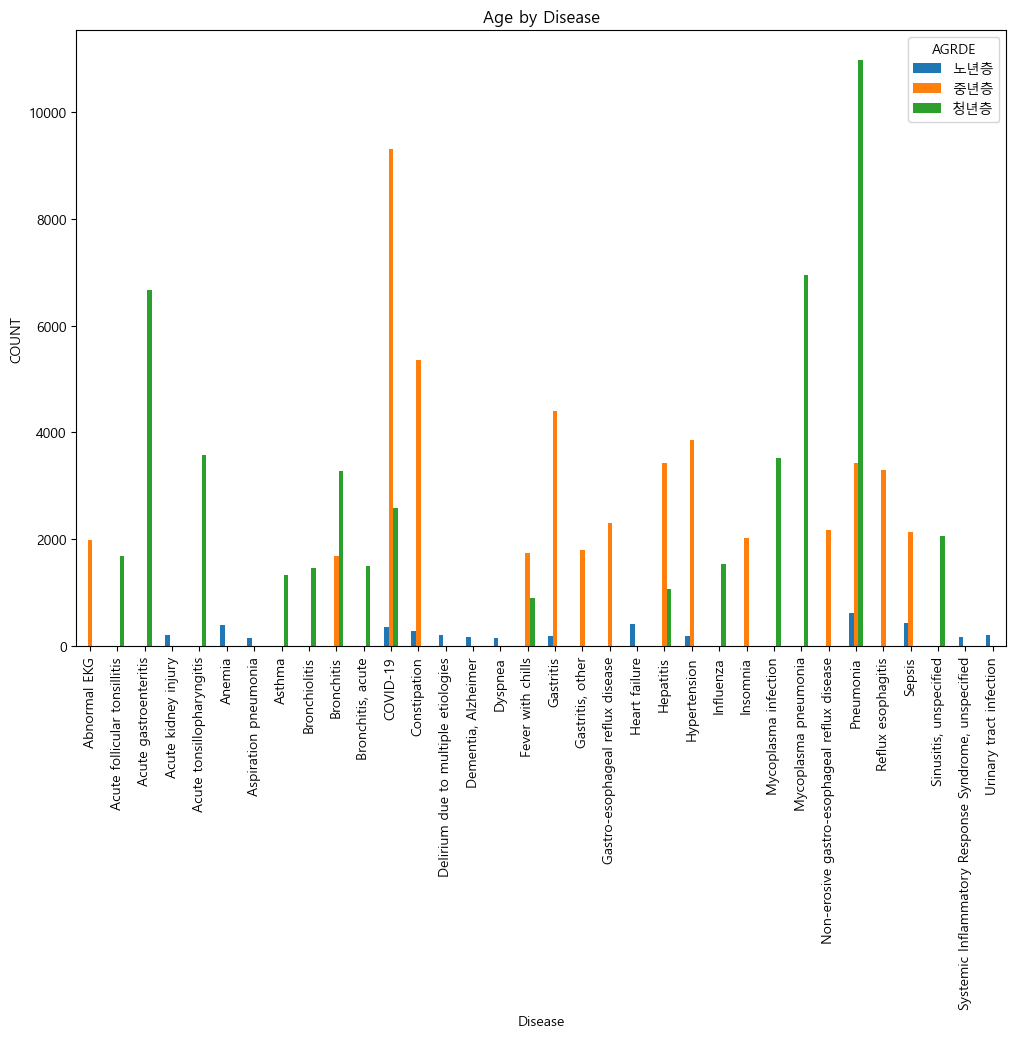

In [391]:
ax = all_age.pivot(index='DIAG_NM', columns='AGRDE', values='COUNT').plot(kind='bar', figsize=(12, 8))

plt.title('Age by Disease')
plt.xlabel('Disease')
plt.ylabel('COUNT')
plt.legend(title='AGRDE')
plt.show()

2. 
데이터셋 : 1_내원정보.csv, 7_치료결과.csv
1) 성별 완치율 및 사망률을 조사하시오.
- 남성/여성별 치료에 따른 완치율, 사망률을 각각 조사하시오.
2) 연령대별 완치/사망률을 조사하시오.
- 연령대별 치료에 따른 완치율, 사망률을 각각 조사하시오.
3) 연령대별 치료기간을 조사하시오.
- 연령대별 치료에 걸리는 평균 기간, 최대/최소 기간 조사하시오.


In [407]:
recov= pd.DataFrame(data.groupby('SEX_CD')['RSLT_CONT'].value_counts().rename('COUNT')).reset_index()
f_recov=recov[recov['SEX_CD']=='F']
fgod_recov = f_recov[(f_recov['RSLT_CONT'] == '경쾌') | (f_recov['RSLT_CONT'] == '완쾌')]
female_recovery_per= fgod_recov["COUNT"].sum()/f_recov['COUNT'].sum()
female_recovery_per # 여성 회복율 0.86

0.8569274094577228

In [410]:
m_recov=recov[recov['SEX_CD']=='M']
mgod_recov = m_recov[(m_recov['RSLT_CONT'] == '경쾌') | (m_recov['RSLT_CONT'] == '완쾌')]
male_recovery_per= mgod_recov["COUNT"].sum()/m_recov['COUNT'].sum()
male_recovery_per # 남성 회복율 0.81

0.8113928888794752

In [422]:
f_die_per = (f_recov.iloc[1,2]+f_recov.iloc[-1,2])/f_recov['COUNT'].sum()
f_die_per # 여성 사망률 : 0.12

0.11689604123920135

In [424]:
m_recov

,SEX_CD,RSLT_CONT,COUNT
7,M,경쾌,1617746
8,M,48시간이후 사망,314043
9,M,완쾌,67814
10,M,호전안됨,43309
11,M,가망없는 퇴원,20526
12,M,진단뿐,7818
13,M,48시간이내 사망,6110


In [425]:
m_die_per = (m_recov.iloc[1,2]+m_recov.iloc[-1,2])/m_recov['COUNT'].sum()
m_die_per # 남성 사망률 : 0.15

0.1541148743168031

In [693]:
age_recov = pd.DataFrame(data.groupby('AGRDE')['RSLT_CONT'].value_counts().rename('COUNT')).reset_index()
age_recov = age_recov.pivot_table(index='AGRDE', columns='RSLT_CONT', values='COUNT', aggfunc='sum').fillna(0).reset_index()
age_recov['회복율(%)'] = (age_recov['완쾌']+age_recov['경쾌']) / age_recov.iloc[:,1:8].sum(axis =1)
age_recov['사망율(%)'] = (age_recov['48시간이후 사망']+age_recov['48시간이내 사망']) / age_recov.iloc[:,1:8].sum(axis =1)
age_recov
from pandas.api.types import CategoricalDtype
age_order = ['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100세 이상']
age_cat_type = CategoricalDtype(categories=age_order, ordered=True)
age_recov['AGRDE'] = age_recov['AGRDE'].astype(age_cat_type)
age_recov = age_recov.sort_values('AGRDE', ascending=True)
age_recov

RSLT_CONT,AGRDE,48시간이내 사망,48시간이후 사망,가망없는 퇴원,경쾌,완쾌,진단뿐,호전안됨,회복율(%),사망율(%)
2,10대미만,20.0,320.0,0.0,173930.0,1184.0,83.0,2265.0,0.984882,0.001912
1,10대,6.0,333.0,0.0,81596.0,852.0,200.0,5211.0,0.934806,0.003844
3,20대,24.0,4441.0,0.0,58241.0,4928.0,77.0,376.0,0.927769,0.065578
4,30대,5.0,4179.0,0.0,93065.0,3729.0,322.0,1011.0,0.946076,0.040895
5,40대,236.0,16242.0,1525.0,194030.0,13752.0,126.0,4437.0,0.902035,0.071535
6,50대,225.0,42105.0,2039.0,318203.0,15353.0,1252.0,3312.0,0.872067,0.110670
7,60대,1615.0,91316.0,8686.0,503480.0,20184.0,3098.0,11569.0,0.818291,0.145216
8,70대,1371.0,143126.0,4382.0,620539.0,28874.0,3007.0,18204.0,0.792447,0.176323
9,80대,4524.0,167126.0,9469.0,756991.0,31147.0,3577.0,19683.0,0.794080,0.172944
10,90대,694.0,34563.0,3015.0,171862.0,5824.0,817.0,5692.0,0.798707,0.158482


In [473]:
data['LTHT_YMD'] = pd.to_datetime(data['LTHT_YMD'], format='%Y%m%d')
data['ADM_YMD'] = pd.to_datetime(data['ADM_YMD'], format='%Y%m%d')

In [476]:
how_ = data[['AGRDE','LTHT_YMD','ADM_YMD']]
how_

,AGRDE,LTHT_YMD,ADM_YMD
0,70대,2056-10-04,2056-09-29
1,70대,2056-10-04,2056-09-29
2,70대,2056-10-04,2056-09-29
3,70대,2056-10-04,2056-09-29
4,70대,2056-10-04,2056-09-29
...,...,...,...
3736365,60대,2021-03-21,2021-03-17
3736366,60대,2021-03-21,2021-03-17
3736367,60대,2021-03-21,2021-03-17
3736368,60대,2021-03-21,2021-03-17


In [478]:
how_['days']=(how_['LTHT_YMD'] - how_['ADM_YMD'])
how_

,AGRDE,LTHT_YMD,ADM_YMD,days
0,70대,2056-10-04,2056-09-29,5 days
1,70대,2056-10-04,2056-09-29,5 days
2,70대,2056-10-04,2056-09-29,5 days
3,70대,2056-10-04,2056-09-29,5 days
4,70대,2056-10-04,2056-09-29,5 days
...,...,...,...,...
3736365,60대,2021-03-21,2021-03-17,4 days
3736366,60대,2021-03-21,2021-03-17,4 days
3736367,60대,2021-03-21,2021-03-17,4 days
3736368,60대,2021-03-21,2021-03-17,4 days


In [698]:
how_long = pd.DataFrame(how_.groupby('AGRDE')['days'].max()).reset_index() 
how_long['AGRDE'] = how_long['AGRDE'].astype(age_cat_type)
how_long = how_long.sort_values('AGRDE', ascending=True)
how_long

,AGRDE,days
2,10대미만,99 days
1,10대,79 days
3,20대,79 days
4,30대,147 days
5,40대,829 days
6,50대,606 days
7,60대,337 days
8,70대,174 days
9,80대,263 days
10,90대,288 days


In [ ]:
how_aver=pd.DataFrame(how_.groupby('AGRDE')['days'].mean()).reset_index() 

In [489]:
from pandas.api.types import CategoricalDtype
age_order = ['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100세 이상']
age_cat_type = CategoricalDtype(categories=age_order, ordered=True)
how_aver['AGRDE'] = how_aver['AGRDE'].astype(age_cat_type)
how_aver = how_aver.sort_values('AGRDE', ascending=True)
how_aver

,AGRDE,days
2,10대미만,10 days 18:17:16.739744209
1,10대,11 days 10:25:45.667702215
3,20대,18 days 20:38:05.193943043
4,30대,19 days 23:23:26.030632092
5,40대,28 days 16:31:23.550106795
6,50대,58 days 23:41:48.279192343
7,60대,41 days 21:08:17.177895704
8,70대,38 days 14:29:27.591332796
9,80대,36 days 03:20:59.318278679
10,90대,28 days 14:14:38.724484980


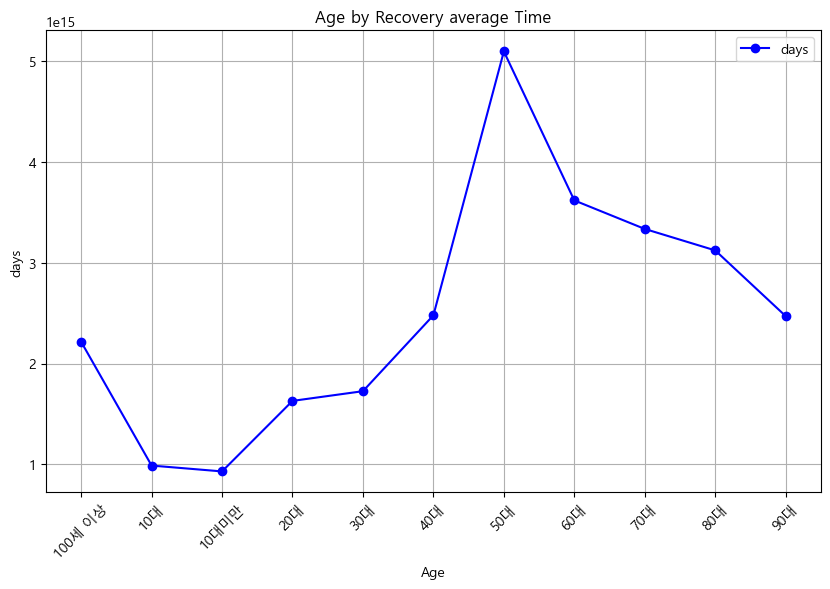

In [697]:
plt.figure(figsize=(10, 6))
plt.plot(how_aver['AGRDE'], how_aver['days'], marker='o', linestyle='-', color='b', label='days')
plt.title('Age by Recovery average Time')
plt.xlabel('Age')
plt.ylabel('days')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show() # 젊을 수록 좋아 회복이 보임

3. 
데이터셋 : 2_바탕질환.csv,  4_항생제처방리스트.csv, 7_치료결과.csv
1) 항생제별 처방용량을 조사하시오.
- 입원후 완치/사망에 이르기까지 처방된 항생제별 용량
- 바탕질환별 항생제 처방 평균 용량

In [591]:
data=df2.merge(df3, on='VTHOS_NO', how='inner')
data=data.merge(df4, on = 'VTHOS_NO', how = 'inner')
data.dropna(axis=1, how='all', inplace=True)
data

,Unnamed: 0,VTHOS_NO,RGNO_x,ICD10CD,DIAG_NM,MAIN_DIAG_YN,RGNO_y,PRSC_CD,MD_NM,INGR_NM,...,LTHT_DPRSC_YN,WARD_CONT,ATC_CONT,GRAM_EXCHE_CONT,ESB_TX_ID_y,ESB_STATE_CD_y,ESB_TIME_y,RGNO,RSLT_CONT,WTHN30_REHOSP_YN
0,0,0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,J21.9,Bronchiolitis,Y,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,D2CLAR04,Clari 250mg,Clarithromycin(항생제),...,N,GW,NaN,NaN,b'',b'',b'',0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,경쾌,N
1,0,0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,J21.9,Bronchiolitis,Y,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,D2CLAR04,Clari 250mg,Clarithromycin(항생제),...,N,GW,NaN,NaN,b'',b'',b'',0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,경쾌,N
2,0,0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,J21.9,Bronchiolitis,Y,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,D2CLAR04,Clari 250mg,Clarithromycin(항생제),...,N,GW,NaN,NaN,b'',b'',b'',0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,경쾌,N
3,0,0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,J21.9,Bronchiolitis,Y,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,D2CLAR04,Clari 250mg,Clarithromycin(항생제),...,N,GW,NaN,NaN,b'',b'',b'',0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,경쾌,N
4,0,0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,J21.9,Bronchiolitis,Y,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,D2CLAR04,Clari 250mg,Clarithromycin(항생제),...,N,GW,NaN,NaN,b'',b'',b'',0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,경쾌,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792673,458260,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,A41.9,Biliary sepsis,N,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,D1MAXI02,Maxipime inj,"Cefepime dihydrochloride(IM,IV,IVF)",...,N,GW,J01DE01,1.0,b'',b'',b'',0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,경쾌,N
3792674,458260,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,A41.9,Biliary sepsis,N,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,D1MAXI02,Maxipime inj,"Cefepime dihydrochloride(IM,IV,IVF)",...,N,GW,J01DE01,1.0,b'',b'',b'',0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,경쾌,N
3792675,458260,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,A41.9,Biliary sepsis,N,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,D1MAXI02,Maxipime inj,"Cefepime dihydrochloride(IM,IV,IVF)",...,N,GW,J01DE01,1.0,b'',b'',b'',0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,경쾌,N
3792676,458260,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,A41.9,Biliary sepsis,N,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,D1MAXI02,Maxipime inj,"Cefepime dihydrochloride(IM,IV,IVF)",...,N,GW,J01DE01,1.0,b'',b'',b'',0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,경쾌,N


In [652]:
antibio = data.groupby("DIAG_NM")['MD_NM','RSLT_CONT','IMPL_CAPA','PRSC_UNIT'].value_counts().rename('COUNT').reset_index()
antibio

,DIAG_NM,MD_NM,RSLT_CONT,IMPL_CAPA,PRSC_UNIT,COUNT
0,(Persistant) Pulmonary hypertension of newborn,Claforan inj(생산중단),경쾌,0.120,g,20
1,(Persistant) Pulmonary hypertension of newborn,Vancomycin inj,경쾌,0.026,g,18
2,(Persistant) Pulmonary hypertension of newborn,Gentamicin inj,경쾌,6.000,mg,4
3,(Persistant) Pulmonary hypertension of newborn,Penbrex inj,경쾌,132.000,mg,4
4,(Persistant) Pulmonary hypertension of newborn,Claforan inj(생산중단),경쾌,0.060,g,2
...,...,...,...,...,...,...
296753,stent thrombosis(coronary artery),TazoPERAN inj,경쾌,13.500,g,10
296754,stent thrombosis(coronary artery),TazoPERAN inj,경쾌,9.000,g,3
296755,stent thrombosis(coronary artery),TazoPERAN inj,경쾌,4.500,g,1
296756,stent thrombosis(coronary artery),Suprax,경쾌,200.000,mg,1


In [633]:
antibio['PRSC_UNIT'].unique()

array(['g', 'mg', 'T*', 'ml', 'Dose', 'Box', '만IU', 'T'], dtype=object)

In [653]:
#antibio[antibio['PRSC_UNIT']=='g'] = antibio[antibio['PRSC_UNIT'] =='g']['IMPL_CAPA']*1000
antibio.loc[antibio['PRSC_UNIT'] == 'g', 'IMPL_CAPA'] = antibio.loc[antibio['PRSC_UNIT'] == 'g',
                                                                     'IMPL_CAPA'] * 1000
antibio.loc[antibio['PRSC_UNIT'] == 'g', 'PRSC_UNIT'] = 'mg'
antibio

,DIAG_NM,MD_NM,RSLT_CONT,IMPL_CAPA,PRSC_UNIT,COUNT
0,(Persistant) Pulmonary hypertension of newborn,Claforan inj(생산중단),경쾌,120.0,mg,20
1,(Persistant) Pulmonary hypertension of newborn,Vancomycin inj,경쾌,26.0,mg,18
2,(Persistant) Pulmonary hypertension of newborn,Gentamicin inj,경쾌,6.0,mg,4
3,(Persistant) Pulmonary hypertension of newborn,Penbrex inj,경쾌,132.0,mg,4
4,(Persistant) Pulmonary hypertension of newborn,Claforan inj(생산중단),경쾌,60.0,mg,2
...,...,...,...,...,...,...
296753,stent thrombosis(coronary artery),TazoPERAN inj,경쾌,13500.0,mg,10
296754,stent thrombosis(coronary artery),TazoPERAN inj,경쾌,9000.0,mg,3
296755,stent thrombosis(coronary artery),TazoPERAN inj,경쾌,4500.0,mg,1
296756,stent thrombosis(coronary artery),Suprax,경쾌,200.0,mg,1


In [654]:
antibio['DIAG_NM'].nunique() # 188개
antibio['DIAG_NM'].value_counts().head()

Pneumonia                                                                2908
Special screening examination for Coronavirus disease 2019 (COVID-19)    2728
Acute gastroenteritis                                                    2097
Bronchitis                                                               2010
Constipation                                                             1831
Name: DIAG_NM, dtype: int64

In [656]:
# covid바이러스 항생제 평균 투여량
covid = antibio[antibio['DIAG_NM']=='Pneumonia']
covid['MD_NM'].value_counts().head()

Ambactam inj (일시품절)                                   197
Gentamicin inj                                        161
Moxicle 0.6g inj =>(안전성 문제) Augmentin 0.6 inj으로 대체    146
Amocla inj                                            115
Ceftriaxone inj 1g 대화                                 103
Name: MD_NM, dtype: int64

In [663]:
covid[covid['MD_NM']=='Ambactam inj (일시품절)']['IMPL_CAPA'].mean() # 2316mg
covid[covid['MD_NM']=='Claforan inj(생산중단)']['IMPL_CAPA'].mean() # 1375mg
covid[covid['MD_NM']=='Vancomycin inj']['IMPL_CAPA'].mean() # 1158mg
covid[covid['MD_NM']=='Penbrex inj']['IMPL_CAPA'].mean() # 2542mg
covid[covid['MD_NM']=='TazoPERAN inj']['IMPL_CAPA'].mean() # 6981mg


2316.395939086294

In [ ]:
antibio['PRSC_CD'].nunique()  # 항생제 총 209개
antibio['PRSC_CD'].value_counts().head()

In [666]:
antibio

,DIAG_NM,MD_NM,RSLT_CONT,IMPL_CAPA,PRSC_UNIT,COUNT
0,(Persistant) Pulmonary hypertension of newborn,Claforan inj(생산중단),경쾌,120.0,mg,20
1,(Persistant) Pulmonary hypertension of newborn,Vancomycin inj,경쾌,26.0,mg,18
2,(Persistant) Pulmonary hypertension of newborn,Gentamicin inj,경쾌,6.0,mg,4
3,(Persistant) Pulmonary hypertension of newborn,Penbrex inj,경쾌,132.0,mg,4
4,(Persistant) Pulmonary hypertension of newborn,Claforan inj(생산중단),경쾌,60.0,mg,2
...,...,...,...,...,...,...
296753,stent thrombosis(coronary artery),TazoPERAN inj,경쾌,13500.0,mg,10
296754,stent thrombosis(coronary artery),TazoPERAN inj,경쾌,9000.0,mg,3
296755,stent thrombosis(coronary artery),TazoPERAN inj,경쾌,4500.0,mg,1
296756,stent thrombosis(coronary artery),Suprax,경쾌,200.0,mg,1


In [681]:
cure_how = antibio[antibio['RSLT_CONT'] == '완쾌']
die_how = antibio[(antibio['RSLT_CONT'] == '48시간이내 사망') | (antibio['RSLT_CONT'] == '48시간이후 사망')]
cure_how = cure_how.sort_values(by='COUNT',ascending=False)
die_how = die_how.sort_values(by='COUNT', ascending=False)
cure_how
die_how

,DIAG_NM,MD_NM,RSLT_CONT,IMPL_CAPA,PRSC_UNIT,COUNT
264748,Special screening examination for Coronavirus ...,TazoPERAN inj,48시간이후 사망,13500.0,mg,1868
264751,Special screening examination for Coronavirus ...,TazoPERAN inj,48시간이후 사망,18000.0,mg,1624
227015,Pneumonia,TazoPERAN inj,48시간이후 사망,18000.0,mg,1396
155989,Hypertension,TazoPERAN inj,48시간이후 사망,13500.0,mg,1193
77057,Constipation,TazoPERAN inj,48시간이후 사망,18000.0,mg,1154
...,...,...,...,...,...,...
190261,Metastasis to pelvic wall,Meropen inj,48시간이후 사망,500.0,mg,1
190260,Metastasis to pelvic wall,Pospenem inj,48시간이후 사망,1000.0,mg,1
190259,Metastasis to pelvic wall,Tapocin inj,48시간이후 사망,400.0,mg,1
190258,Metastasis to pelvic wall,Tapocin inj,48시간이후 사망,800.0,mg,1


In [687]:
cure_how

,DIAG_NM,MD_NM,RSLT_CONT,IMPL_CAPA,PRSC_UNIT,COUNT
264760,Special screening examination for Coronavirus ...,Ceftriaxone inj 보령,완쾌,2000.0,mg,1036
264778,Special screening examination for Coronavirus ...,TazoPERAN inj,완쾌,13500.0,mg,645
156015,Hypertension,Ceftriaxone inj 보령,완쾌,2000.0,mg,488
264788,Special screening examination for Coronavirus ...,TazoPERAN inj,완쾌,18000.0,mg,469
227049,Pneumonia,TazoPERAN inj,완쾌,18000.0,mg,412
...,...,...,...,...,...,...
137066,General weakness,TazoPERAN inj,완쾌,4500.0,mg,1
137065,General weakness,TazoPERAN inj,완쾌,6750.0,mg,1
137063,General weakness,Vancomycin inj,완쾌,1000.0,mg,1
137062,General weakness,Vancomycin inj,완쾌,667.0,mg,1


In [685]:
cure_how['IMPL_CAPA'].mean() # 2534 

2534.86383439204

In [686]:
die_how['IMPL_CAPA'].mean() # 2456

2456.87664164463

In [ ]:
# 항생제 용량별 완치/사망은 별다른 의미가 없다.